# Cross-Benchmark Analysis of LLM Performance

This notebook analyzes the performance of various Large Language Models (LLMs) 
across multiple benchmarks, specifically MMLU (biology-related subtasks) and GPQA.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime
import numpy as np

In [2]:
gpqa_results_path = 'gpqa/results.csv'
mmlu_results_path = 'mmlu/results.csv'
wmdp_results_path = 'wmdp/results.csv'
litqa2_results_path = 'lab-bench-litqa2/results.csv'
pubmedqa_results_path = 'pubmedqa/results.csv'

In [3]:
gpqa_df = pd.read_csv(gpqa_results_path)
mmlu_df = pd.read_csv(mmlu_results_path)
wmdp_df = pd.read_csv(wmdp_results_path)
litqa2_df = pd.read_csv(litqa2_results_path)
pubmedqa_df = pd.read_csv(pubmedqa_results_path)

In [4]:
# Function to parse dates
def parse_date(date_str):
    try:
        return datetime.strptime(date_str, "%Y-%m-%d")
    except:
        return None
    
# Prepare the data
gpqa_df['Publication date'] = gpqa_df['Publication date'].apply(parse_date)
mmlu_df['Publication date'] = mmlu_df['Publication date'].apply(parse_date)
wmdp_df['Publication date'] = wmdp_df['Publication date'].apply(parse_date)
litqa2_df['Publication date'] = litqa2_df['Publication date'].apply(parse_date)
pubmedqa_df['Publication date'] = pubmedqa_df['Publication date'].apply(parse_date)

# Filter for biggest_in_class models
gpqa_df = gpqa_df[gpqa_df['biggest_in_class'] == 1]
mmlu_df = mmlu_df[mmlu_df['biggest_in_class'] == 1]
wmdp_df = wmdp_df[wmdp_df['biggest_in_class'] == 1]
litqa2_df = litqa2_df[litqa2_df['biggest_in_class'] == 1]
pubmedqa_df = pubmedqa_df[pubmedqa_df['biggest_in_class'] == 1]

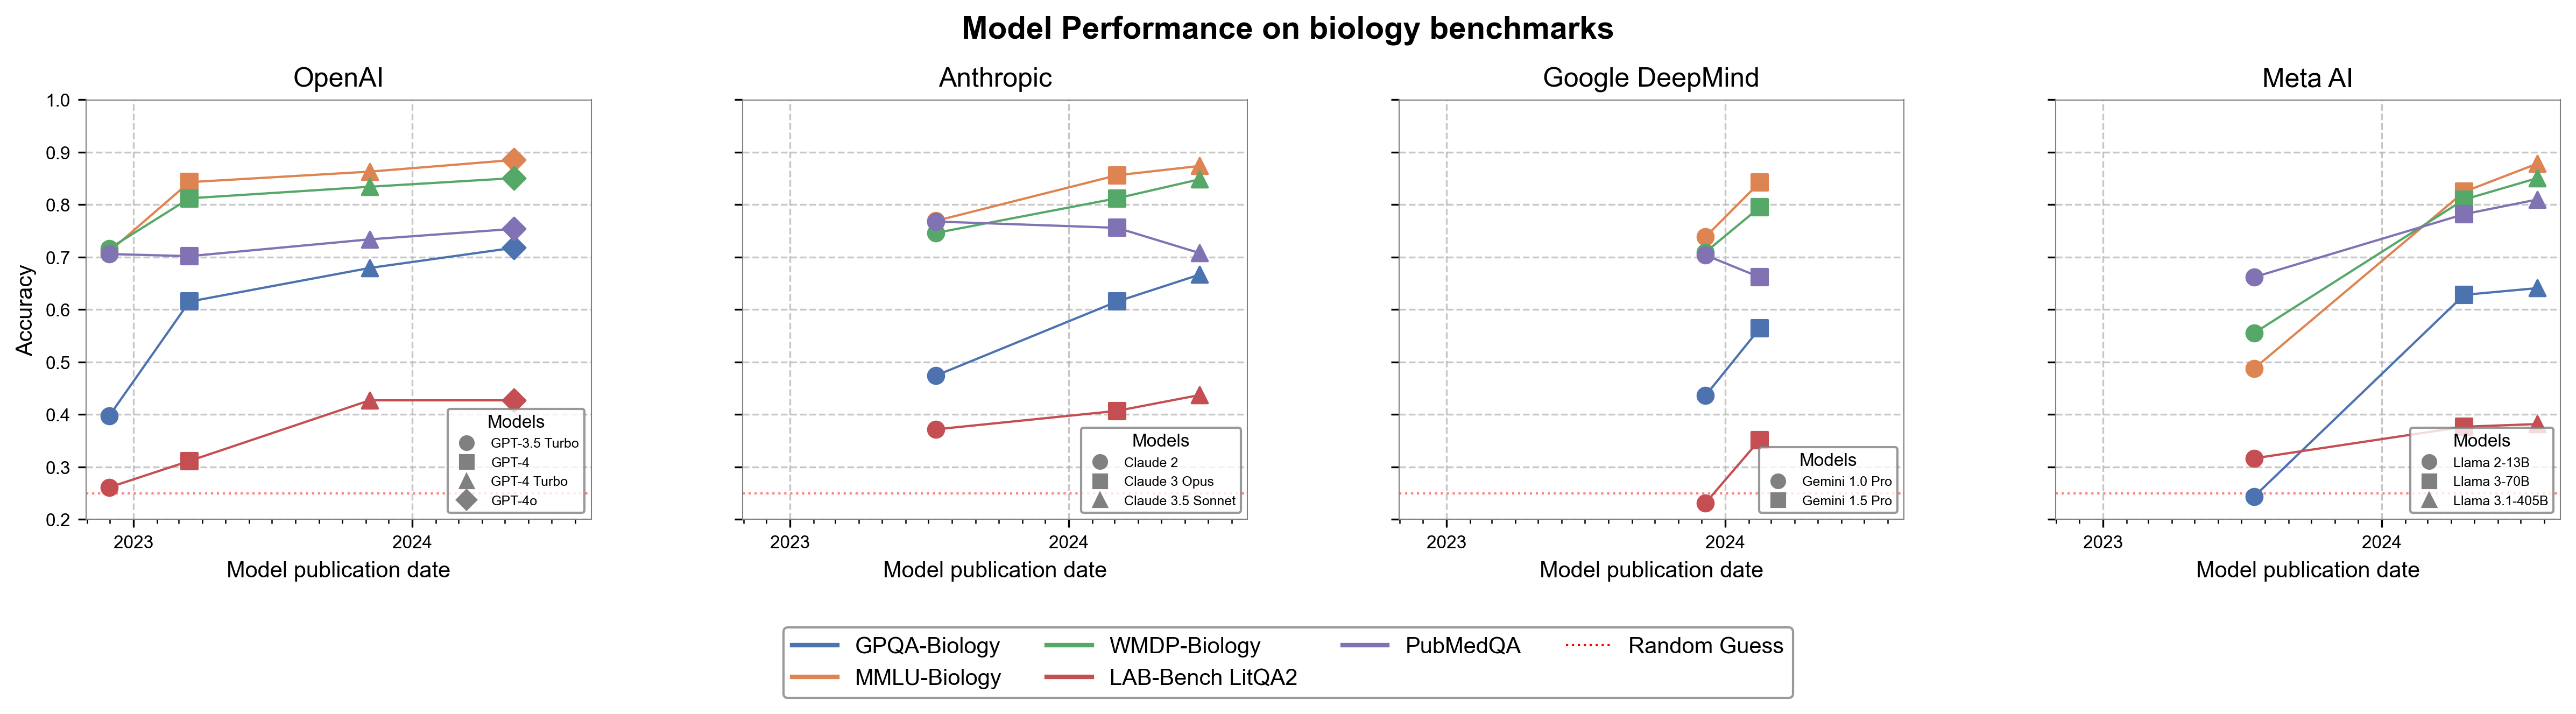

In [5]:
# Set plot style for publication-quality figure
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 8
plt.rcParams['axes.linewidth'] = 0.5
plt.rcParams['axes.edgecolor'] = 'gray'

# Define organizations and their colors
organizations = ['OpenAI', 'Anthropic', 'Google DeepMind', 'Meta AI']

color_map = dict(zip(['GPQA-Biology', 'MMLU-Biology', 'WMDP-Biology', 'LAB-Bench LitQA2', 'PubMedQA'], sns.color_palette("deep", 5)))  # Updated to 3 colors

# Define marker styles for different models
marker_styles = ['o', 's', '^', 'D', 'p', '*', 'h', 'v']

# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(16, 4), dpi=300, sharex=True, sharey=True)
fig.suptitle("Model Performance on biology benchmarks", fontsize=14, fontweight='bold')

# Plot data for each organization
for i, org in enumerate(organizations):
    ax = axs[i]
    org_models = {}
    
    for df, benchmark in [(gpqa_df, 'GPQA-Biology'), (mmlu_df, 'MMLU-Biology'), (wmdp_df, 'WMDP-Biology'), (litqa2_df, 'LAB-Bench LitQA2'), (pubmedqa_df, 'PubMedQA')]:
        org_data = df[df['Organization'] == org].sort_values('Publication date')
        if not org_data.empty:
            for j, (_, row) in enumerate(org_data.iterrows()):
                model_name = row['epoch_model_name']
                if model_name not in org_models:
                    org_models[model_name] = marker_styles[len(org_models) % len(marker_styles)]
                
                ax.scatter(row['Publication date'], row['accuracy'], 
                           color=color_map[benchmark], 
                           marker=org_models[model_name], s=50, zorder=3)
                
            # Connect points with lines
            ax.plot(org_data['Publication date'], org_data['accuracy'], 
                    color=color_map[benchmark], linestyle='-', linewidth=1, zorder=2)

    # Add random performance line
    ax.axhline(y=0.25, color='red', linestyle=':', alpha=0.5, linewidth=1, zorder=1)

    # Customize the subplot
    ax.set_title(org, fontsize=12)
    ax.set_ylim(0.2, 1)
    ax.grid(True, linestyle='--', alpha=0.7, zorder=0)

    # Format x-axis
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    
    # Add x-label to all subplots
    ax.set_xlabel("Model publication date", fontsize=10)
    
    # Only add y-label to leftmost subplot
    if i == 0:
        ax.set_ylabel("Accuracy", fontsize=10)

    # Add legend for models within each subplot
    legend_elements = [plt.Line2D([0], [0], marker=marker, color='gray', 
                                  label=model, markersize=6, linestyle='')
                       for model, marker in org_models.items()]
    ax.legend(handles=legend_elements, fontsize=6, title="Models", title_fontsize=8, 
              loc='lower right', bbox_to_anchor=(1, 0), ncol=1, frameon=True, edgecolor='gray')

# Adjust layout
plt.tight_layout()
fig.subplots_adjust(top=0.85, bottom=0.2, wspace=0.3)  # Adjust for main title and x-labels

# Add a single legend for benchmarks
benchmark_handles = [plt.Line2D([0], [0], color=color_map[b], lw=2) for b in ['GPQA-Biology', 'MMLU-Biology', 'WMDP-Biology', 'LAB-Bench LitQA2', 'PubMedQA']]
random_line = plt.Line2D([0], [0], color='red', linestyle=':', linewidth=1)
benchmark_handles.append(random_line)
benchmark_labels = ['GPQA-Biology', 'MMLU-Biology', 'WMDP-Biology', 'LAB-Bench LitQA2', 'PubMedQA', 'Random Guess']
fig.legend(benchmark_handles, benchmark_labels, loc='upper center', bbox_to_anchor=(0.5, 0.05), 
           ncol=4, fontsize=10, frameon=True, edgecolor='gray')

# Save the figure
plt.savefig('cross_benchmark_performance_subplots.png', dpi=300, bbox_inches='tight')
plt.show()

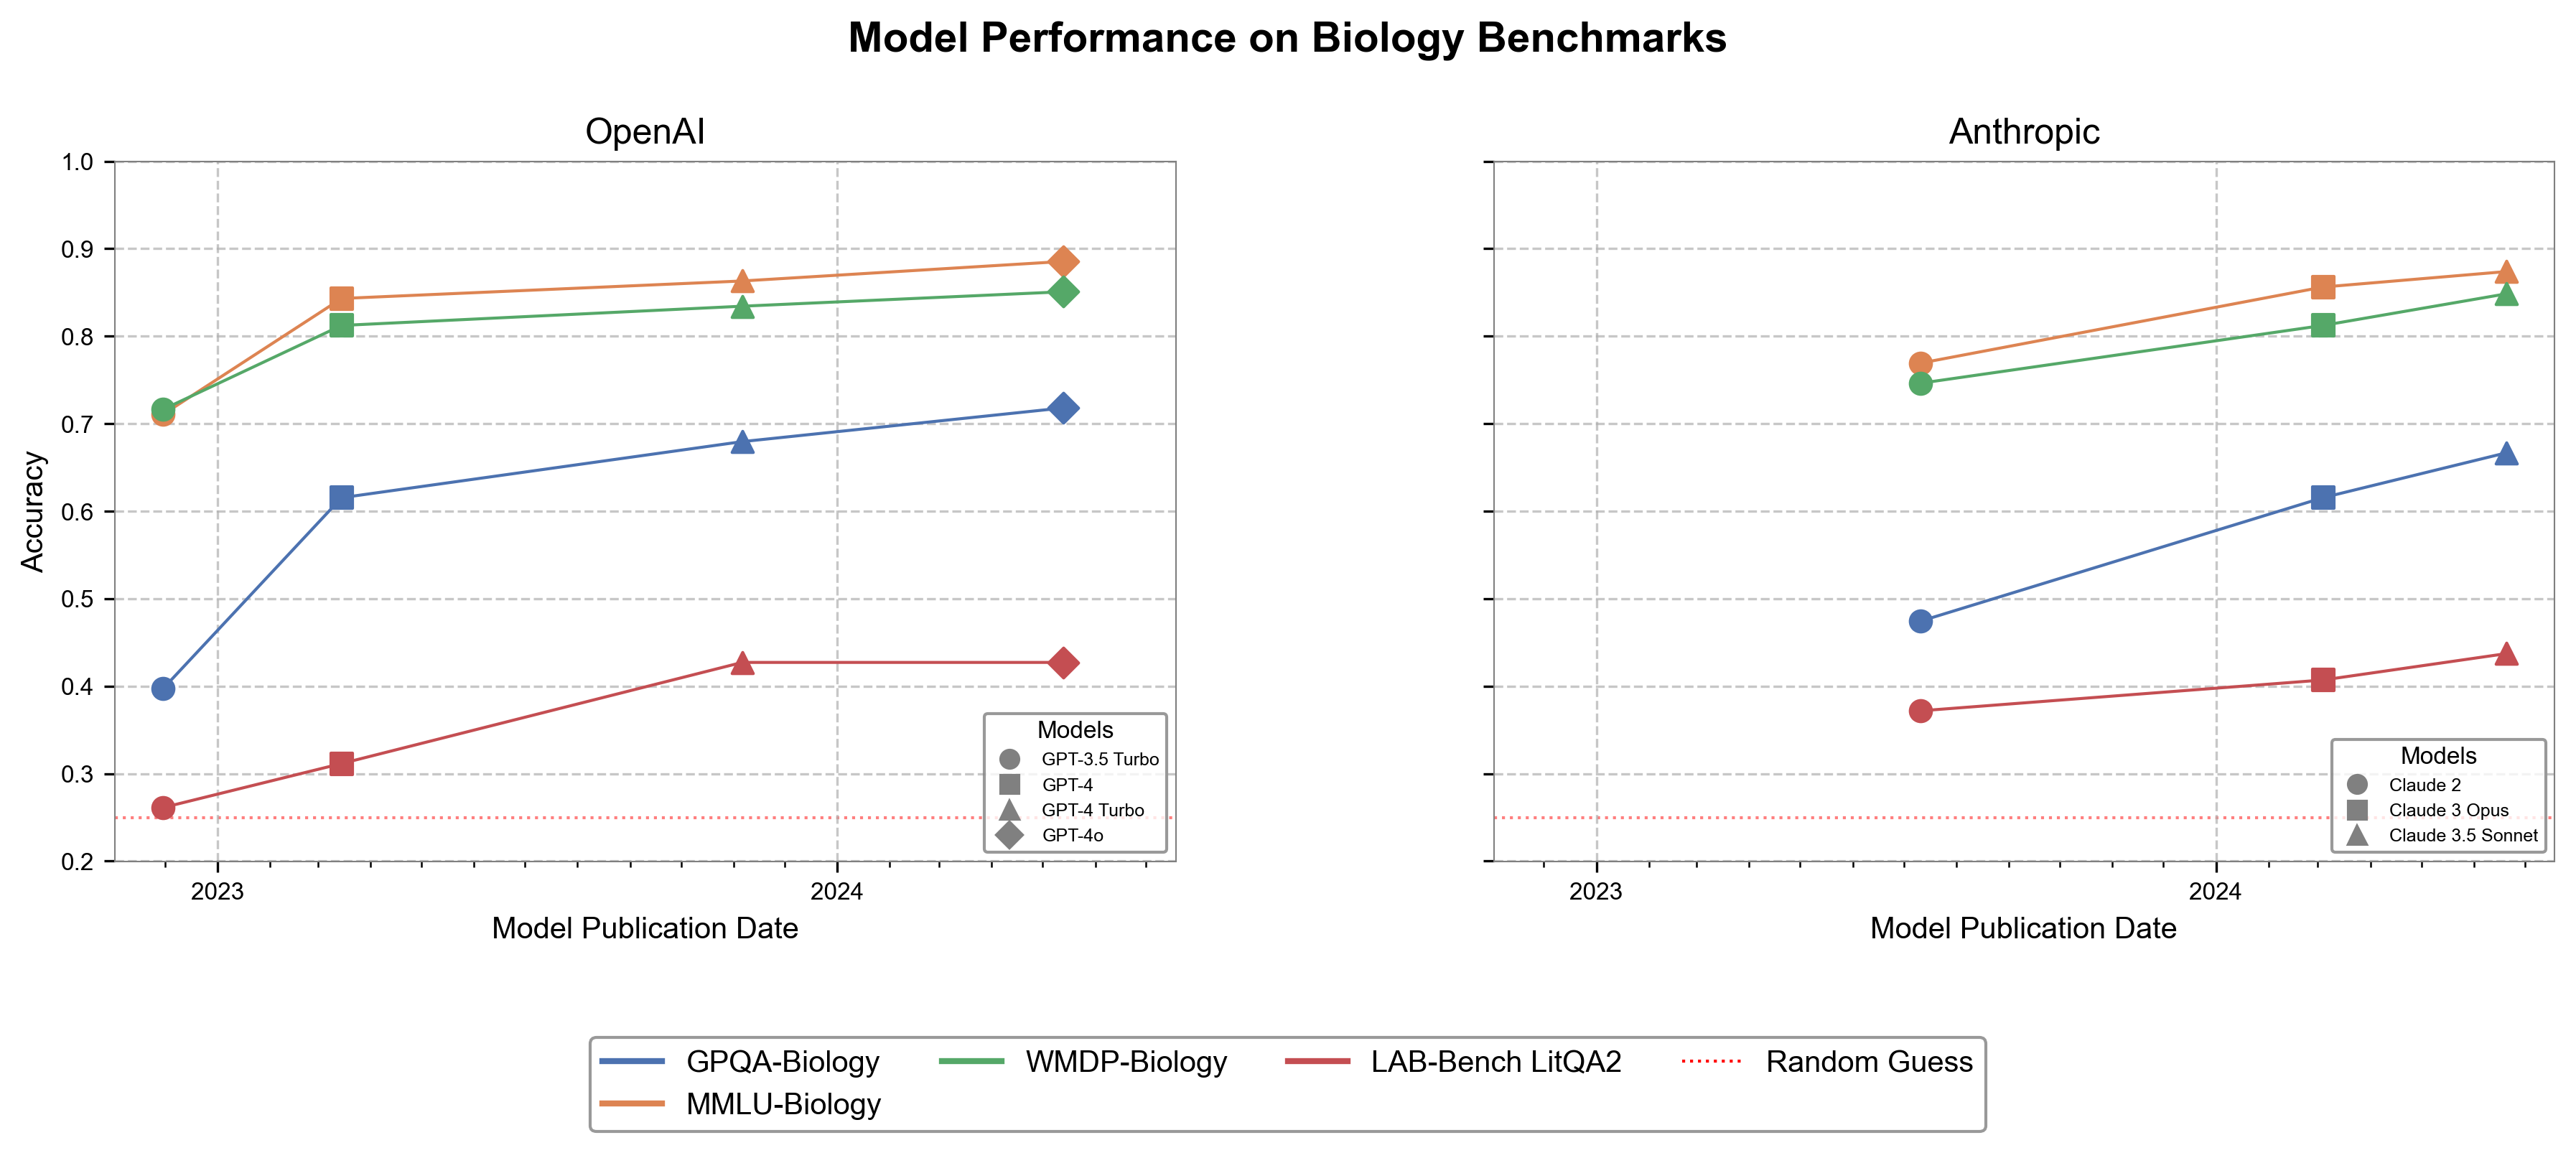

In [6]:
# Set plot style for publication-quality figure
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 8
plt.rcParams['axes.linewidth'] = 0.5
plt.rcParams['axes.edgecolor'] = 'gray'

# Define organizations and their colors
organizations = ['OpenAI', 'Anthropic']
color_map = dict(zip(['GPQA-Biology', 'MMLU-Biology', 'WMDP-Biology', 'LAB-Bench LitQA2'], sns.color_palette("deep", 4)))

# Define marker styles for different models
marker_styles = ['o', 's', '^', 'D', 'p', '*', 'h', 'v']

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5), dpi=300, sharex=True, sharey=True)
fig.suptitle("Model Performance on Biology Benchmarks", fontsize=14, fontweight='bold')

# Plot data for each organization
for i, org in enumerate(organizations):
    ax = axs[i]
    org_models = {}
    
    for df, benchmark in [(gpqa_df, 'GPQA-Biology'), (mmlu_df, 'MMLU-Biology'), (wmdp_df, 'WMDP-Biology'), (litqa2_df, 'LAB-Bench LitQA2')]:
        org_data = df[df['Organization'] == org].sort_values('Publication date')
        if not org_data.empty:
            for j, (_, row) in enumerate(org_data.iterrows()):
                model_name = row['epoch_model_name']
                if model_name not in org_models:
                    org_models[model_name] = marker_styles[len(org_models) % len(marker_styles)]
                
                ax.scatter(row['Publication date'], row['accuracy'], 
                           color=color_map[benchmark], 
                           marker=org_models[model_name], s=50, zorder=3)
                
            # Connect points with lines
            ax.plot(org_data['Publication date'], org_data['accuracy'], 
                    color=color_map[benchmark], linestyle='-', linewidth=1, zorder=2)

    # Add random performance line
    ax.axhline(y=0.25, color='red', linestyle=':', alpha=0.5, linewidth=1, zorder=1)

    # Customize the subplot
    ax.set_title(org, fontsize=12)
    ax.set_ylim(0.2, 1)
    ax.grid(True, linestyle='--', alpha=0.7, zorder=0)

    # Format x-axis
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    
    # Add x-label to all subplots
    ax.set_xlabel("Model Publication Date", fontsize=10)
    
    # Only add y-label to leftmost subplot
    if i == 0:
        ax.set_ylabel("Accuracy", fontsize=10)

    # Add legend for models within each subplot
    legend_elements = [plt.Line2D([0], [0], marker=marker, color='gray', 
                                  label=model, markersize=6, linestyle='')
                       for model, marker in org_models.items()]
    ax.legend(handles=legend_elements, fontsize=6, title="Models", title_fontsize=8, 
              loc='lower right', bbox_to_anchor=(1, 0), ncol=1, frameon=True, edgecolor='gray')

# Adjust layout
plt.tight_layout()
fig.subplots_adjust(top=0.85, bottom=0.2, wspace=0.3)  # Adjust for main title and x-labels

# Add a single legend for benchmarks
benchmark_handles = [plt.Line2D([0], [0], color=color_map[b], lw=2) for b in ['GPQA-Biology', 'MMLU-Biology', 'WMDP-Biology', 'LAB-Bench LitQA2']]
random_line = plt.Line2D([0], [0], color='red', linestyle=':', linewidth=1)
benchmark_handles.append(random_line)
benchmark_labels = ['GPQA-Biology', 'MMLU-Biology', 'WMDP-Biology', 'LAB-Bench LitQA2', 'Random Guess']
fig.legend(benchmark_handles, benchmark_labels, loc='upper center', bbox_to_anchor=(0.5, 0.05), 
           ncol=4, fontsize=10, frameon=True, edgecolor='gray')

# Save the figure
plt.savefig('cross_benchmark_performance_subplots_openai_anthropic.png', dpi=300, bbox_inches='tight')
plt.show()